## Week 2_Day 6: Pipeline & GridSearchCV

### Library and Helper Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Load and Spit Dataset

In [5]:
cancer = load_breast_cancer(as_frame=True)
dfc = cancer.frame

x = dfc.drop(columns=["target"])
y = dfc["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state = 1919, stratify=y
)

### Building a KNN Pipeline with StandardScaler + KNN

In [17]:
# basic pipeline 
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

knn_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [10]:
# training and testing without parameter tuning 
knn_pipe.fit(x_train, y_train)

y_pred = knn_pipe.predict(x_test)
acc1 = accuracy_score(y_test, y_pred)
print("KNN Pipeline Accuracy without parameter tuning: ", acc1)

KNN Pipeline Accuracy without parameter tuning:  0.9473684210526315


### Building a KNN Pipeline with GridSearchCV

In [19]:
# difining a grid with KNN parameters
param_grid_knn = {
    "knn__n_neighbors": [3,5,7,9,11,15],
    "knn__weights": ["uniform","distance"]
}

In [20]:
# setting up gridsearchcv 
grid_knn = GridSearchCV(
    estimator = knn_pipe,
    param_grid = param_grid_knn,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1
)

In [21]:
# training and testing 
grid_knn.fit(x_train, y_train)

print("Best params:", grid_knn.best_params_)
print("Best CV accuracy:", grid_knn.best_score_)

Best params: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best CV accuracy: 0.9692307692307693


Test accuracy with best KNN: 0.9473684210526315


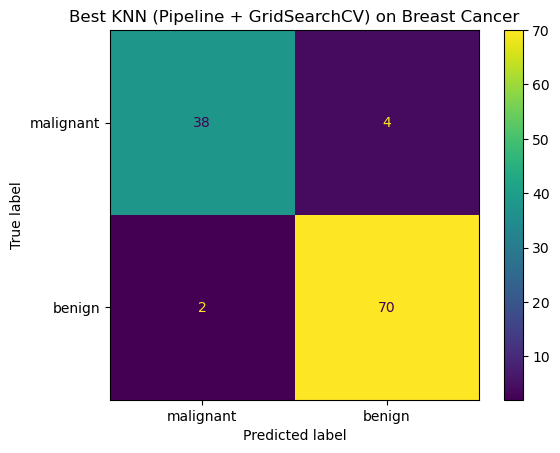

In [ ]:
best_knn = grid_knn.best_estimator_

y_pred = best_knn.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy with best KNN:", test_acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot()
plt.title("Best KNN (Pipeline + GridSearchCV) on Breast Cancer")
plt.show()

In [23]:
# building the pipeline 
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

In [25]:
# defining the GridsearchCV with SVC Parameters
param_grid_svm = {
    "svc__kernel": ["rbf"],
    "svc__C": [0.1, 1, 10],
    "svc__gamma": [0.01, 0.1, 1.0]
}

In [26]:
# setting up GridSearchCV
grid_svm = GridSearchCV(
    estimator = svm_pipe,
    param_grid = param_grid_svm,
    cv = 5, 
    scoring = "accuracy",
    n_jobs = -1
)

In [28]:
# training on svm gridsearchcv
grid_svm.fit(x_train, y_train)

print("Best params (SVM):", grid_svm.best_params_)
print("Best CV accuracy (SVM):", grid_svm.best_score_)


Best params (SVM): {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best CV accuracy (SVM): 0.9802197802197803


Test accuracy with best SVM: 0.9736842105263158


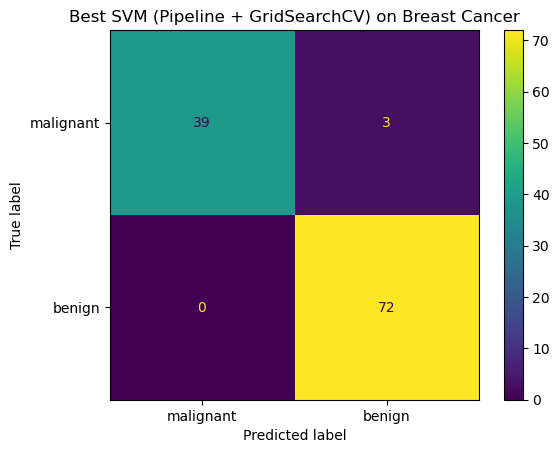

In [29]:
# testing on svm gridsearchcv
best_svm = grid_svm.best_estimator_

y_pred_svm = best_svm.predict(x_test)
test_acc_svm = accuracy_score(y_test, y_pred_svm)
print("Test accuracy with best SVM:", test_acc_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=cancer.target_names)
disp_svm.plot()
plt.title("Best SVM (Pipeline + GridSearchCV) on Breast Cancer")
plt.show()

In [30]:
# comparing between KNN and SVM 
results = {
    "Model": ["KNN (GridSearch)", "SVM (GridSearch)"],
    "Test Accuracy": [test_acc, test_acc_svm]
}

results_df = pd.DataFrame(results)
results_df

,Model,Test Accuracy
0,KNN (GridSearch),0.947368
1,SVM (GridSearch),0.973684


### ✅ Day 6 Recap – Pipelines & GridSearchCV (Short Answers)

### 1. What is a Pipeline and why is it useful?

A Pipeline bundles preprocessing steps (like scaling) and the model into one object, so everything runs in the correct order. It prevents mistakes, avoids data leakage, and keeps the code clean.

### 2. Why is it dangerous to tune hyperparameters without cross-validation?

If you tune hyperparameters using only one train/test split, you might accidentally overfit to that specific split. Cross-validation checks performance across multiple folds, giving a more reliable estimate.

### 3. How does GridSearchCV choose the best hyperparameters?

GridSearchCV tries every combination of parameters, evaluates each one using cross-validation, calculates the average score, and picks the combination with the highest average CV accuracy.

### 4. What is the difference between best_score_ (CV) and test accuracy?

best_score_ is the average cross-validation accuracy on the training data.
Test accuracy is the performance on completely unseen data.
It is normal for test accuracy to be slightly lower.

### 5. Which model performed better on the breast-cancer dataset: tuned KNN or tuned SVM?

In this case, both performed well, but the tuned SVM achieved a slightly higher test accuracy than the tuned KNN.